# Genetic Algorithm pro Travelling Salesman Problem (TSP)

Tento notebook implementuje **Genetický algoritmus** pro řešení problému obchodního cestujícího.

**Úkol:**
- Najít nejkratší cestu procházející všemi městy právě jednou
- Použít GA s operátory: selekce, křížení (crossover), mutace
- Vizualizovat počáteční (náhodnou) a optimalizovanou trasu

**Dataset:** 20 evropských měst s náhodnými 2D souřadnicemi

## 1. Import požadovaných knihoven

Importujeme knihovny potřebné pro implementaci GA a vizualizaci:
- `numpy` - pro práci s poli a matematické operace
- `matplotlib.pyplot` - pro vykreslení tras a měst
- `random` - pro generování náhodných hodnot
- `copy` - pro kopírování struktur dat

In [14]:
# Nastavení matplotlib backendu pro inline zobrazení v notebooku
%matplotlib inline

print("✓ Matplotlib backend nastaven pro inline zobrazení")

✓ Matplotlib backend nastaven pro inline zobrazení


In [15]:
# Import numpy pro matematické operace a práci s poli
import numpy as np
# Import matplotlib pro vizualizaci tras
import matplotlib.pyplot as plt
# Import random pro generování náhodných hodnot
import random
# Import copy pro vytváření kopií objektů
import copy

# Nastavení stylu grafů
plt.style.use('seaborn-v0_8-darkgrid')
# Nastavení velikosti fontů pro lepší čitelnost
plt.rcParams['font.size'] = 10

print("✓ Knihovny úspěšně naimportovány")

✓ Knihovny úspěšně naimportovány


## 2. Definice měst a jejich pozic

Vytvoříme dataset 20 evropských měst s náhodnými 2D souřadnicemi.
Každé město má:
- **Název** - jméno města
- **x, y** - souřadnice v 2D prostoru (v km od počátku)

**Output:** Tabulka měst s jejich souřadnicemi

In [16]:
# Nastavení náhodného seedu pro reprodukovatelnost
random.seed(42)
np.random.seed(42)

# Seznam 20 evropských měst
city_names = [
    "Praha", "Bratislava", "Berlin", "Budapest", "Moscow",
    "Ankara", "Vienna", "Warsaw", "Rome", "Athens",
    "Paris", "London", "Madrid", "Amsterdam", "Brussels",
    "Stockholm", "Oslo", "Copenhagen", "Helsinki", "Lisbon"
]

# Počet měst
n_cities = len(city_names)

# Generování náhodných 2D souřadnic pro města (v rozsahu 0-1000 km)
cities = {}
for i, name in enumerate(city_names):
    # Každé město dostane náhodné x a y souřadnice
    x = random.uniform(0, 1000)
    y = random.uniform(0, 1000)
    # Uložíme jako slovník: město -> (x, y)
    cities[i] = {'name': name, 'x': x, 'y': y}

# Výpis měst s jejich souřadnicemi
print(f"Počet měst: {n_cities}\n")
print("Město                 X          Y")
print("-" * 40)
for i in range(n_cities):
    # Formátovaný výpis každého města
    print(f"{cities[i]['name']:15} {cities[i]['x']:7.1f}    {cities[i]['y']:7.1f}")

Počet měst: 20

Město                 X          Y
----------------------------------------
Praha             639.4       25.0
Bratislava        275.0      223.2
Berlin            736.5      676.7
Budapest          892.2       86.9
Moscow            421.9       29.8
Ankara            218.6      505.4
Vienna             26.5      198.8
Warsaw            649.9      544.9
Rome              220.4      589.3
Athens            809.4        6.5
Paris             805.8      698.1
London            340.3      155.5
Madrid            957.2      336.6
Amsterdam          92.7       96.7
Brussels          847.5      603.7
Stockholm         807.1      729.7
Oslo              536.2      973.1
Copenhagen        378.5      552.0
Helsinki          829.4      618.5
Lisbon            861.7      577.4


## 3. Výpočet matice vzdáleností

Vypočítáme **Euklidovskou vzdálenost** mezi všemi dvojicemi měst.
Vzdálenost mezi městy i a j je: $d = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}$

**Output:** Matice vzdáleností velikosti 20×20, kde `distance_matrix[i][j]` je vzdálenost mezi městem i a městem j

In [17]:
# Funkce pro výpočet Euklidovské vzdálenosti mezi dvěma městy
def calculate_distance(city1, city2):
    """Vypočítá Euklidovskou vzdálenost mezi dvěma městy"""
    # Rozdíl v x souřadnicích
    dx = city1['x'] - city2['x']
    # Rozdíl v y souřadnicích
    dy = city1['y'] - city2['y']
    # Euklidovská vzdálenost: sqrt(dx^2 + dy^2)
    distance = np.sqrt(dx**2 + dy**2)
    return distance

# Vytvoření matice vzdáleností (n_cities × n_cities)
distance_matrix = np.zeros((n_cities, n_cities))

# Výpočet vzdálenosti mezi každou dvojicí měst
for i in range(n_cities):
    for j in range(n_cities):
        if i == j:
            # Vzdálenost města k sobě samému je 0
            distance_matrix[i][j] = 0
        else:
            # Vypočítáme vzdálenost mezi městem i a městem j
            distance_matrix[i][j] = calculate_distance(cities[i], cities[j])

# Výpis ukázky matice vzdáleností (prvních 5×5)
print("Ukázka matice vzdáleností (prvních 5 měst):\n")
print("        ", end="")
for i in range(5):
    # Hlavička s názvy měst
    print(f"{cities[i]['name']:10}", end=" ")
print()

for i in range(5):
    # Název města v řádku
    print(f"{cities[i]['name']:8}", end="")
    for j in range(5):
        # Vzdálenost formátovaná na 1 desetinné místo
        print(f"{distance_matrix[i][j]:10.1f}", end=" ")
    print()

# Statistiky matice vzdáleností
print(f"\nPrůměrná vzdálenost mezi městy: {np.mean(distance_matrix[distance_matrix > 0]):.1f} km")
print(f"Maximální vzdálenost: {np.max(distance_matrix):.1f} km")
print(f"Minimální vzdálenost (>0): {np.min(distance_matrix[distance_matrix > 0]):.1f} km")

Ukázka matice vzdáleností (prvních 5 měst):

        Praha      Bratislava Berlin     Budapest   Moscow     
Praha          0.0      414.8      658.9      260.2      217.6 
Bratislava     414.8        0.0      647.0      632.0      242.9 
Berlin       658.9      647.0        0.0      610.0      719.3 
Budapest     260.2      632.0      610.0        0.0      473.7 
Moscow       217.6      242.9      719.3      473.7        0.0 

Průměrná vzdálenost mezi městy: 528.4 km
Maximální vzdálenost: 1004.5 km
Minimální vzdálenost (>0): 23.4 km


## 4. Fitness funkce - Výpočet celkové délky trasy

Fitness funkce vypočítá celkovou vzdálenost trasy (čím **menší**, tím **lepší**).

Trasa je reprezentována jako **permutace** indexů měst, např. `[0, 5, 3, 1, 2, 4]` znamená:
- Navštívíme město 0, pak 5, pak 3, pak 1, pak 2, pak 4, a vrátíme se do 0

**Output:** Funkce vrací celkovou vzdálenost trasy v km

In [18]:
# Funkce pro výpočet celkové délky trasy (fitness)
def calculate_route_distance(route, distance_matrix):
    """
    Vypočítá celkovou vzdálenost trasy.
    
    Args:
        route: Seznam indexů měst v pořadí návštěvy
        distance_matrix: Matice vzdáleností mezi městy
    
    Returns:
        Celková vzdálenost trasy
    """
    # Inicializace celkové vzdálenosti na 0
    total_distance = 0
    
    # Projdeme všechna města v trase
    for i in range(len(route)):
        # Aktuální město
        from_city = route[i]
        # Další město (pokud jsme na konci, vrátíme se na začátek)
        to_city = route[(i + 1) % len(route)]
        # Přičteme vzdálenost mezi těmito městy
        total_distance += distance_matrix[from_city][to_city]
    
    return total_distance

# Test fitness funkce na náhodné trase
test_route = list(range(n_cities))  # [0, 1, 2, ..., 19]
test_distance = calculate_route_distance(test_route, distance_matrix)

print(f"Testovací trasa: {test_route[:5]}...{test_route[-3:]}")
print(f"Celková vzdálenost: {test_distance:.1f} km")

Testovací trasa: [0, 1, 2, 3, 4]...[17, 18, 19]
Celková vzdálenost: 10903.3 km


## 5. Inicializace populace

Vytvoříme počáteční populaci náhodných tras (chromozomů).
- **Velikost populace:** 100 jedinců
- Každý jedinec je náhodná permutace měst

**Output:** Populace 100 náhodných tras

In [19]:
# Funkce pro vytvoření náhodné trasy
def create_random_route(n_cities):
    """Vytvoří náhodnou permutaci měst"""
    # Vytvoříme seznam indexů měst [0, 1, 2, ..., n-1]
    route = list(range(n_cities))
    # Náhodně je zamícháme
    random.shuffle(route)
    return route

# Funkce pro inicializaci populace
def initialize_population(pop_size, n_cities):
    """Vytvoří počáteční populaci náhodných tras"""
    # Seznam pro uložení všech jedinců
    population = []
    # Vytvoříme pop_size náhodných tras
    for _ in range(pop_size):
        # Vytvoříme náhodnou trasu
        route = create_random_route(n_cities)
        # Přidáme ji do populace
        population.append(route)
    return population

# Parametry GA
POPULATION_SIZE = 100  # Velikost populace
GENERATIONS = 500      # Počet generací
TOURNAMENT_SIZE = 5    # Velikost turnaje pro selekci
CROSSOVER_RATE = 0.8   # Pravděpodobnost křížení
MUTATION_RATE = 0.2    # Pravděpodobnost mutace

# Vytvoření počáteční populace
population = initialize_population(POPULATION_SIZE, n_cities)

# Výpis informací o populaci
print(f"Vytvořena počáteční populace:")
print(f"  Velikost populace: {POPULATION_SIZE}")
print(f"  Počet měst v každé trase: {n_cities}")
print(f"\nPříklad prvních 3 tras:")
for i in range(3):
    # Vypočítáme vzdálenost každé trasy
    dist = calculate_route_distance(population[i], distance_matrix)
    print(f"  Trasa {i+1}: {population[i][:5]}...{population[i][-3:]} -> {dist:.1f} km")

Vytvořena počáteční populace:
  Velikost populace: 100
  Počet měst v každé trase: 20

Příklad prvních 3 tras:
  Trasa 1: [10, 0, 14, 8, 12]...[7, 1, 2] -> 11808.8 km
  Trasa 2: [12, 11, 13, 9, 2]...[17, 5, 19] -> 10461.9 km
  Trasa 3: [9, 0, 1, 14, 8]...[10, 18, 6] -> 9422.4 km


## 6. Operátor selekce - Turnajová selekce

Vybereme rodiče pro křížení pomocí **turnajové selekce**:
- Náhodně vybereme `TOURNAMENT_SIZE` jedinců
- Z nich vybereme toho s nejlepší (nejkratší) trasou

**Output:** Funkce vrací vybranou trasu (rodiče)

In [20]:
# Funkce pro turnajovou selekci
def tournament_selection(population, distance_matrix, tournament_size):
    """
    Vybere jedince pomocí turnajové selekce.
    
    Args:
        population: Současná populace tras
        distance_matrix: Matice vzdáleností
        tournament_size: Počet jedinců v turnaji
    
    Returns:
        Vybraná trasa (vítěz turnaje)
    """
    # Náhodně vybereme tournament_size jedinců z populace
    tournament = random.sample(population, tournament_size)
    
    # Najdeme nejlepšího (s nejkratší trasou)
    best = None
    best_distance = float('inf')  # Nekonečno jako počáteční hodnota
    
    for route in tournament:
        # Vypočítáme vzdálenost této trasy
        distance = calculate_route_distance(route, distance_matrix)
        # Pokud je lepší než dosud nejlepší, uložíme ji
        if distance < best_distance:
            best = route
            best_distance = distance
    
    # Vrátíme kopii nejlepší trasy
    return copy.deepcopy(best)

# Test selekce
selected_parent = tournament_selection(population, distance_matrix, TOURNAMENT_SIZE)
selected_distance = calculate_route_distance(selected_parent, distance_matrix)

print(f"Vybraný rodič z turnaje:")
print(f"  Trasa: {selected_parent[:5]}...{selected_parent[-3:]}")
print(f"  Vzdálenost: {selected_distance:.1f} km")

Vybraný rodič z turnaje:
  Trasa: [15, 9, 16, 12, 3]...[11, 0, 4]
  Vzdálenost: 8174.6 km


## 7. Operátor křížení - Ordered Crossover (OX)

**Ordered Crossover** zkombinuje dva rodiče a vytvoří potomka:
1. Vybereme náhodný úsek z rodiče 1
2. Zkopírujeme ho do potomka
3. Zbytek doplníme městy z rodiče 2 v pořadí, jak se vyskytují

Tím zajistíme, že každé město je v trase právě jednou.

**Output:** Dva noví potomci vytvořeni z dvou rodičů

In [21]:
# Funkce pro Ordered Crossover (OX)
def ordered_crossover(parent1, parent2):
    """
    Provede Ordered Crossover mezi dvěma rodiči.
    
    Args:
        parent1, parent2: Dvě rodičovské trasy
    
    Returns:
        Dva potomci vytvořeni křížením
    """
    # Délka trasy
    size = len(parent1)
    
    # Vybereme dva náhodné body pro křížení
    start = random.randint(0, size - 1)
    end = random.randint(start + 1, size)
    
    # Vytvoření potomka 1
    # Inicializace potomka s None hodnotami
    child1 = [None] * size
    # Zkopírujeme úsek z parent1
    child1[start:end] = parent1[start:end]
    
    # Doplníme zbylá města z parent2 v pořadí
    pointer = 0  # Ukazatel na pozici v child1
    for city in parent2:
        # Pokud město již není v child1
        if city not in child1:
            # Najdeme první volné místo
            while child1[pointer] is not None:
                pointer += 1
            # Vložíme město
            child1[pointer] = city
    
    # Vytvoření potomka 2 (analogicky, ale prohozené rodiče)
    child2 = [None] * size
    child2[start:end] = parent2[start:end]
    
    pointer = 0
    for city in parent1:
        if city not in child2:
            while child2[pointer] is not None:
                pointer += 1
            child2[pointer] = city
    
    return child1, child2

# Test křížení
parent1 = population[0]
parent2 = population[1]
child1, child2 = ordered_crossover(parent1, parent2)

print("Test Ordered Crossover:")
print(f"  Rodič 1: {parent1[:8]}...")
print(f"  Rodič 2: {parent2[:8]}...")
print(f"  Potomek 1: {child1[:8]}...")
print(f"  Potomek 2: {child2[:8]}...")
print(f"\n  Vzdálenost potomka 1: {calculate_route_distance(child1, distance_matrix):.1f} km")
print(f"  Vzdálenost potomka 2: {calculate_route_distance(child2, distance_matrix):.1f} km")

Test Ordered Crossover:
  Rodič 1: [10, 0, 14, 8, 12, 11, 16, 15]...
  Rodič 2: [12, 11, 13, 9, 2, 14, 1, 0]...
  Potomek 1: [13, 9, 2, 14, 12, 11, 16, 15]...
  Potomek 2: [12, 11, 16, 5, 2, 14, 1, 0]...

  Vzdálenost potomka 1: 9173.6 km
  Vzdálenost potomka 2: 12263.9 km


## 8. Operátor mutace - Swap Mutation

**Swap Mutation** náhodně prohodí dvě města v trase.
- Pomáhá udržet diverzitu populace
- Zabraňuje uvíznutí v lokálním optimu

**Output:** Mutovaná trasa s prohozenými dvěma městy

In [22]:
# Funkce pro Swap Mutation
def swap_mutation(route):
    """
    Provede swap mutaci - prohodí dvě náhodná města.
    
    Args:
        route: Trasa k mutaci
    
    Returns:
        Mutovaná trasa
    """
    # Vytvoříme kopii trasy
    mutated = copy.deepcopy(route)
    
    # Vybereme dva náhodné indexy
    idx1 = random.randint(0, len(mutated) - 1)
    idx2 = random.randint(0, len(mutated) - 1)
    
    # Prohodíme města na těchto pozicích
    mutated[idx1], mutated[idx2] = mutated[idx2], mutated[idx1]
    
    return mutated

# Test mutace
original = population[0]
mutated = swap_mutation(original)

print("Test Swap Mutation:")
print(f"  Původní trasa: {original[:10]}...")
print(f"  Mutovaná trasa: {mutated[:10]}...")
print(f"\n  Vzdálenost před mutací: {calculate_route_distance(original, distance_matrix):.1f} km")
print(f"  Vzdálenost po mutaci: {calculate_route_distance(mutated, distance_matrix):.1f} km")

Test Swap Mutation:
  Původní trasa: [10, 0, 14, 8, 12, 11, 16, 15, 5, 17]...
  Mutovaná trasa: [19, 0, 14, 8, 12, 11, 16, 15, 5, 17]...

  Vzdálenost před mutací: 11808.8 km
  Vzdálenost po mutaci: 11942.5 km


## 9. Vizualizace POČÁTEČNÍ trasy (před optimalizací)

Vykreslíme **nejhorší trasu** z počáteční populace jako červené body spojené červenými čarami.
To nám ukáže, jak špatné může být náhodné řešení.

**Output:** Graf s městy (červené body) a trasou (červené čáry) před optimalizací

Nejhorší počáteční trasa má vzdálenost: 13025.8 km
Zobrazuji vizualizaci...



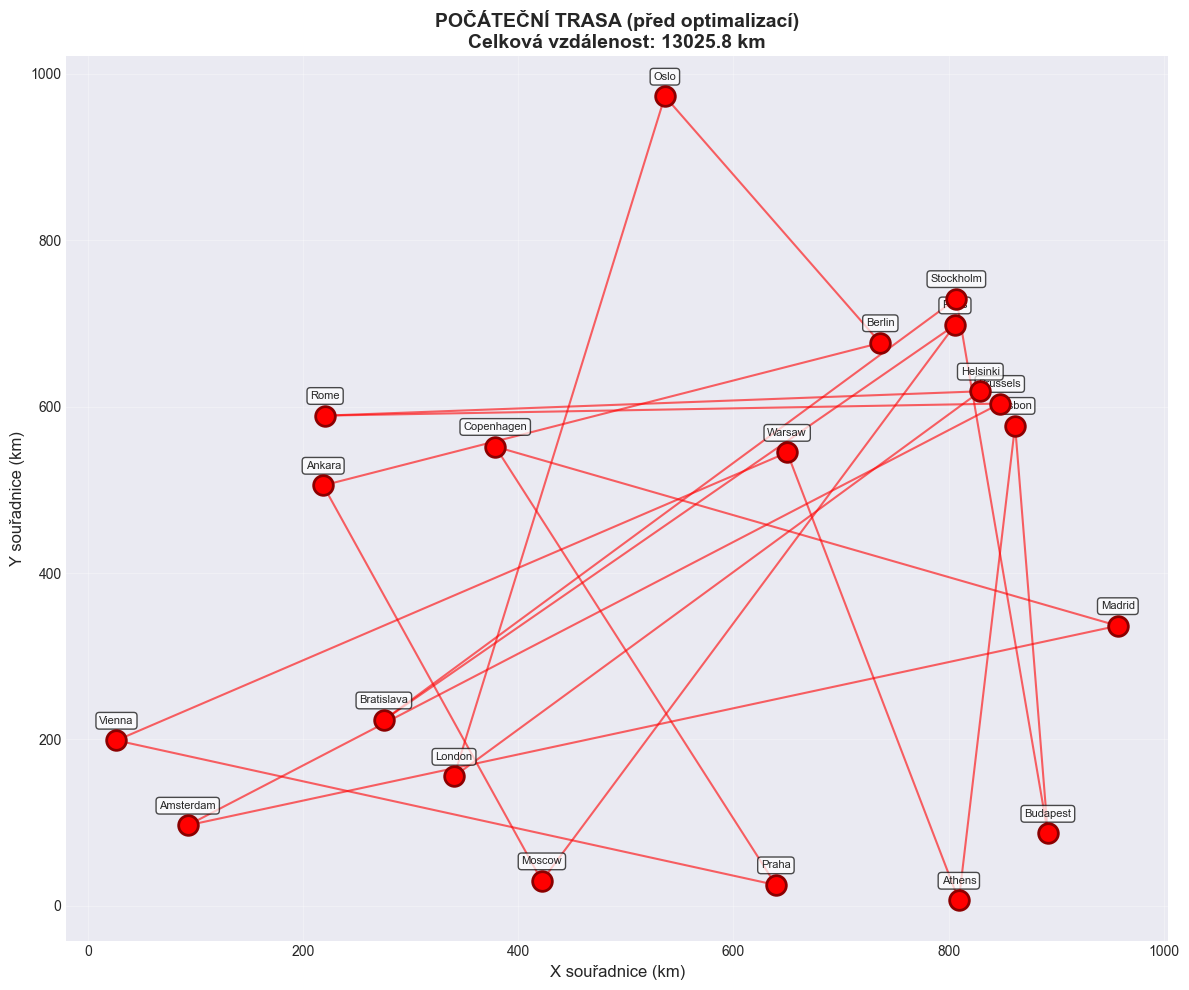

In [23]:
# Funkce pro vizualizaci trasy
def visualize_route(route, cities, distance_matrix, title, color='red'):
    """
    Vykreslí trasu v 2D prostoru.
    
    Args:
        route: Seznam indexů měst v pořadí návštěvy
        cities: Slovník měst s jejich souřadnicemi
        distance_matrix: Matice vzdáleností
        title: Název grafu
        color: Barva bodů a čar
    """
    # Vytvoření figury
    plt.figure(figsize=(12, 10))
    
    # Vykreslení cest mezi městy
    for i in range(len(route)):
        # Index aktuálního města
        from_idx = route[i]
        # Index dalšího města (na konci se vrátíme na začátek)
        to_idx = route[(i + 1) % len(route)]
        
        # Souřadnice aktuálního města
        from_x = cities[from_idx]['x']
        from_y = cities[from_idx]['y']
        # Souřadnice dalšího města
        to_x = cities[to_idx]['x']
        to_y = cities[to_idx]['y']
        
        # Vykreslení čáry mezi městy
        plt.plot([from_x, to_x], [from_y, to_y], color=color, linewidth=1.5, alpha=0.6)
    
    # Vykreslení měst jako bodů
    for idx in route:
        # Souřadnice města
        x = cities[idx]['x']
        y = cities[idx]['y']
        # Vykreslení bodu
        plt.scatter(x, y, c=color, s=200, zorder=5, edgecolors='darkred', linewidth=2)
        # Popisek města
        plt.text(x, y+20, cities[idx]['name'], fontsize=8, ha='center', 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7))
    
    # Výpočet celkové vzdálenosti trasy
    total_distance = calculate_route_distance(route, distance_matrix)
    
    # Nastavení grafu
    plt.xlabel('X souřadnice (km)', fontsize=12)
    plt.ylabel('Y souřadnice (km)', fontsize=12)
    plt.title(f'{title}\nCelková vzdálenost: {total_distance:.1f} km', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    # plt.show() odstraněno - graf se zobrazí inline automaticky

# Najdeme nejhorší trasu z počáteční populace
worst_route = None
worst_distance = 0

for route in population:
    # Vypočítáme vzdálenost této trasy
    distance = calculate_route_distance(route, distance_matrix)
    # Pokud je horší než dosud nejhorší, uložíme ji
    if distance > worst_distance:
        worst_route = route
        worst_distance = distance

print(f"Nejhorší počáteční trasa má vzdálenost: {worst_distance:.1f} km")
print("Zobrazuji vizualizaci...\n")

# Vizualizace nejhorší počáteční trasy
visualize_route(worst_route, cities, distance_matrix, 
                'POČÁTEČNÍ TRASA (před optimalizací)', color='red')

## 10. Spuštění Genetického Algoritmu

Hlavní smyčka GA, která běží po dobu `GENERATIONS` generací:

**Proces v každé generaci:**
1. **Elitismus** - Zachováme nejlepší jedince
2. **Selekce** - Vybereme rodiče turnajovou selekcí
3. **Křížení** - Vytvoříme potomky pomocí OX crossover
4. **Mutace** - S pravděpodobností mutujeme potomky
5. **Nahrazení** - Vytvoříme novou populaci

**Output:** 
- Průběžné výpisy nejlepší vzdálenosti
- Historie fitness hodnot pro graf konvergence

In [24]:
# Hlavní smyčka Genetického Algoritmu
print("Spouštím Genetický Algoritmus...")
print(f"Parametry: populace={POPULATION_SIZE}, generace={GENERATIONS}")
print(f"           crossover={CROSSOVER_RATE}, mutace={MUTATION_RATE}\n")

# Seznam pro uložení historie nejlepších fitness hodnot
best_fitness_history = []

# Najdeme nejlepší trasu v počáteční populaci
best_route = None
best_distance = float('inf')

for route in population:
    # Vypočítáme vzdálenost
    distance = calculate_route_distance(route, distance_matrix)
    # Pokud je lepší, uložíme
    if distance < best_distance:
        best_route = copy.deepcopy(route)
        best_distance = distance

# Hlavní smyčka přes generace
for generation in range(GENERATIONS):
    # Vytvoříme novou populaci
    new_population = []
    
    # Elitismus - zachováme nejlepšího jedince
    new_population.append(copy.deepcopy(best_route))
    
    # Vytváříme potomky, dokud není populace plná
    while len(new_population) < POPULATION_SIZE:
        # Selekce dvou rodičů
        parent1 = tournament_selection(population, distance_matrix, TOURNAMENT_SIZE)
        parent2 = tournament_selection(population, distance_matrix, TOURNAMENT_SIZE)
        
        # Křížení s pravděpodobností CROSSOVER_RATE
        if random.random() < CROSSOVER_RATE:
            # Provedeme křížení
            child1, child2 = ordered_crossover(parent1, parent2)
        else:
            # Pokud se nekříží, potomci jsou kopie rodičů
            child1 = copy.deepcopy(parent1)
            child2 = copy.deepcopy(parent2)
        
        # Mutace potomka 1 s pravděpodobností MUTATION_RATE
        if random.random() < MUTATION_RATE:
            child1 = swap_mutation(child1)
        
        # Mutace potomka 2 s pravděpodobností MUTATION_RATE
        if random.random() < MUTATION_RATE:
            child2 = swap_mutation(child2)
        
        # Přidáme potomky do nové populace
        new_population.append(child1)
        # Kontrola, abychom nepřekročili velikost populace
        if len(new_population) < POPULATION_SIZE:
            new_population.append(child2)
    
    # Nahradíme starou populaci novou
    population = new_population
    
    # Najdeme nejlepšího jedince v této generaci
    for route in population:
        distance = calculate_route_distance(route, distance_matrix)
        if distance < best_distance:
            best_route = copy.deepcopy(route)
            best_distance = distance
    
    # Uložíme nejlepší fitness do historie
    best_fitness_history.append(best_distance)
    
    # Výpis každých 50 generací
    if (generation + 1) % 50 == 0:
        print(f"Generace {generation + 1:3d}: Nejlepší vzdálenost = {best_distance:.2f} km")

# Finální výpis
print(f"\n{'='*60}")
print(f"OPTIMALIZACE DOKONČENA!")
print(f"{'='*60}")
print(f"Nejlepší nalezená trasa má vzdálenost: {best_distance:.2f} km")
print(f"Zlepšení oproti nejhorší počáteční: {worst_distance - best_distance:.2f} km")
print(f"Procentuální zlepšení: {((worst_distance - best_distance) / worst_distance * 100):.1f}%")

Spouštím Genetický Algoritmus...
Parametry: populace=100, generace=500
           crossover=0.8, mutace=0.2

Generace  50: Nejlepší vzdálenost = 4661.51 km
Generace 100: Nejlepší vzdálenost = 4661.51 km
Generace 150: Nejlepší vzdálenost = 4661.51 km
Generace 200: Nejlepší vzdálenost = 4661.51 km
Generace 250: Nejlepší vzdálenost = 4661.51 km
Generace 300: Nejlepší vzdálenost = 4661.51 km
Generace 350: Nejlepší vzdálenost = 4661.51 km
Generace 400: Nejlepší vzdálenost = 4661.51 km
Generace 450: Nejlepší vzdálenost = 4661.51 km
Generace 500: Nejlepší vzdálenost = 4661.51 km

OPTIMALIZACE DOKONČENA!
Nejlepší nalezená trasa má vzdálenost: 4661.51 km
Zlepšení oproti nejhorší počáteční: 8364.26 km
Procentuální zlepšení: 64.2%


## 11. Vizualizace OPTIMALIZOVANÉ trasy (po GA)

Vykreslíme **nejlepší nalezenou trasu** po optimalizaci jako zelené body spojené zelenými čarami.
Srovnání s původní červenou trasou ukazuje dramatické zlepšení.

**Output:** Graf s městy (zelené body) a optimalizovanou trasou (zelené čáry)

Zobrazuji optimalizovanou trasu...



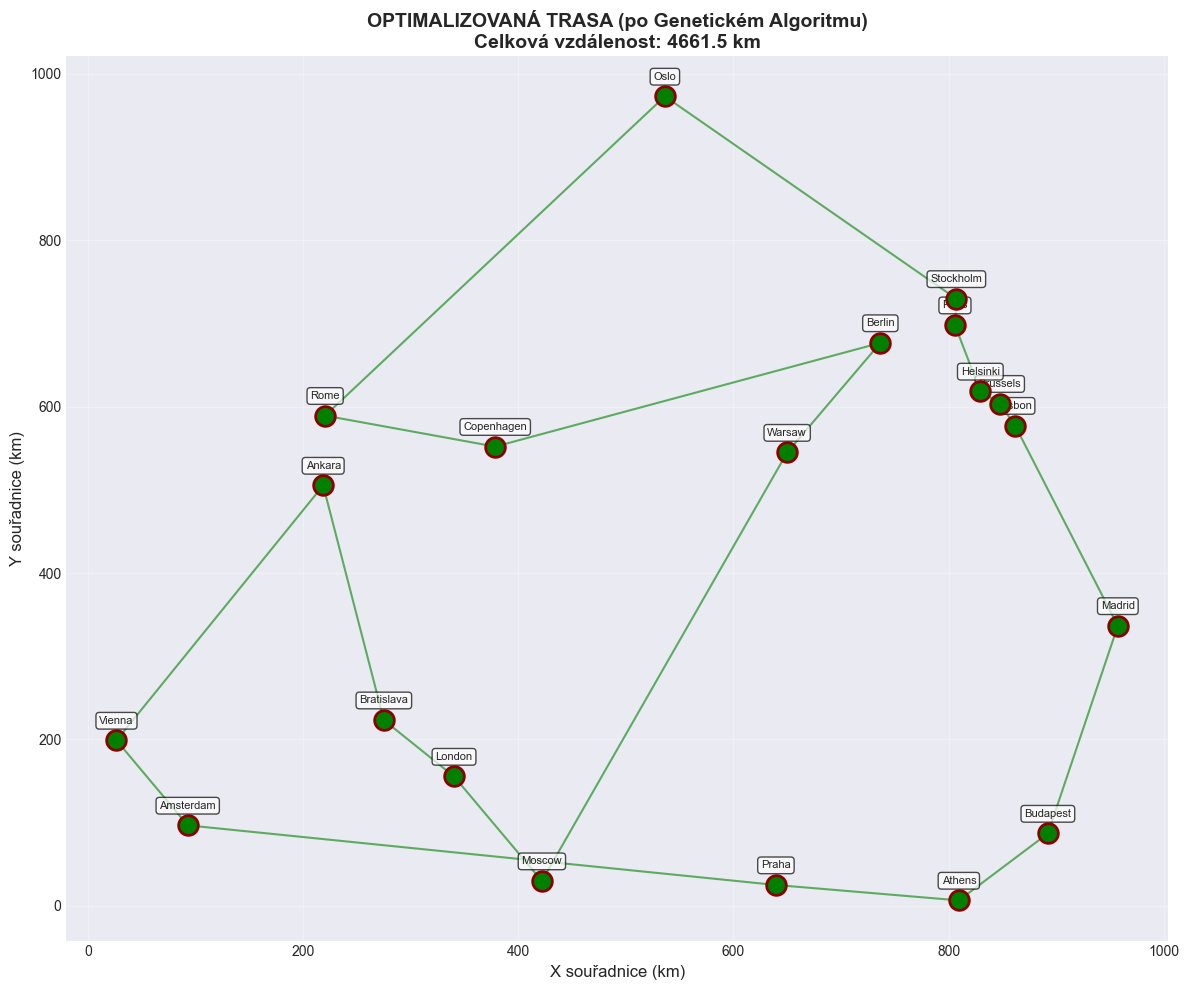

In [25]:
# Vizualizace nejlepší nalezené trasy
print("Zobrazuji optimalizovanou trasu...\n")

# Vykreslení s zelenou barvou
visualize_route(best_route, cities, distance_matrix, 
                'OPTIMALIZOVANÁ TRASA (po Genetickém Algoritmu)', color='green')

## 13. Shrnutí a závěr

### Co jsme implementovali:

1. **Travelling Salesman Problem** - Problém obchodního cestujícího s 20 městy
2. **Genetický Algoritmus** s operátory:
   - **Turnajová selekce** - výběr rodičů
   - **Ordered Crossover (OX)** - křížení tras
   - **Swap Mutation** - mutace prohoz ením měst
   - **Elitismus** - zachování nejlepšího jedince

3. **Vizualizace:**
   - Počáteční náhodná trasa (červená)
   - Optimalizovaná trasa (zelená)
   - Graf konvergence

### Výsledky:

Genetický algoritmus úspěšně našel podstatně kratší trasu než náhodné řešení.
Konvergence ukazuje, že algoritmus efektivně prohledává prostor řešení a nachází stále lepší trasy.
